*continued from [Titanic 01](https://github.com/alstjgg/TIL/blob/master/Data%20Science/Titanic%2001.ipynb)*

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
import pandas as pd
train_df = pd.read_csv('/Users/student/Desktop/B반_인공지능_NLP_기반_데이터_분석/data/train.csv')
test_df = pd.read_csv('/Users/student/Desktop/B반_인공지능_NLP_기반_데이터_분석/data/test.csv')

# Wrangling Data
#### Wrangling
: correct and create data > make it more appropritate and **valuable** for analysis

## 1. Convert Categorical Data
Categorical data is not useful in finding correlation or predicting a value.  
Therefore, it is useful to convert categorical datas into ordinal data
### Convert Sex into ordinal
As **Sex** is a categorical data feature with 2 types, we can easily convert into ordinal data

In [246]:
for dataset in [train_df]:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)

### Convert Embark into oridnal

In [247]:
for dataset in [train_df]:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

## 2. Drop Data
> drop feature to deal with fewer data  

**Hypothsis**: *Cabin* and *Ticket* features can be dropped, as they are either incomplete, or has little correlation to the target

In [248]:
train_df.drop(['Cabin', 'Ticket'], axis=1)  # axis=1: delete column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1.0


## 3. Create Data by combination
> can we create new data from original data to contain more meaning?

### Creation of Title
First, let's look at the *Name* feature

In [249]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

*Names* contains the **Title**(Mr., Mrs., Dr., etc) of each person.  
We can extract this information and create a new feature **Title**, and find correlation between some feature and, most importantly, survival.

In [250]:
for dataset in [train_df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

Some titles are mainly given to either men or women, while some title are rare itself.  
Some titles seem to be misspelled, so we can correct them on the way  
> Mlle : Miss / Ms : Miss / Mme : Mrs

We can also group rare titles(*Capt, Col, Countess, Don, Dr, Jonkheer, Lady, Major, Rev, Sir*) as **rare**

In [251]:
for dataset in [train_df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

#### Correlation between Title and Sex

In [252]:
pd.crosstab(train_df['Sex'], train_df['Title'])

Title,Master,Miss,Mr,Mrs,Rare
Sex,,,,,
0,0,185,0,126,3
1,40,0,517,0,20


#### Correlation between Title and Survival

In [253]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


#### Conversion to Ordinal data
As *Title* is a categorical, we should convert it to ordinal. Also, the original featuere *Name* should be dropped.

In [254]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)

In [255]:
train_df['Title'].describe()

count    891.000000
mean       1.728395
std        1.030039
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Title, dtype: float64

### Creation of FamilySize

In [256]:
for dataset in [train_df]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)

#### Correlation between FamilySize and Survival

In [257]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


## 4. Complete Numerical Data
As we have observed, some data features have missing values.  
Unlike previous data features that had too many missing values, some features can be complete

To fill numerical data, we can used 2 numbers.  
1. Use **Median**
2. Use **Standard deviation**  

As the second method can create unwanted noise, we will use **median** value to fill empty data.  

### Completing Fare

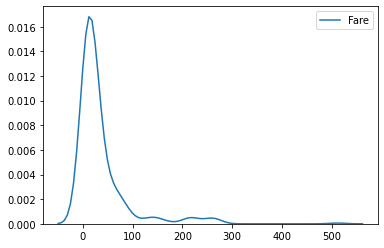

In [258]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)  # median of fare values excluding nan
sns.kdeplot(test_df['Fare'])
plt.show()

As Fare is continuous, it is helptul to divide values into certain bands.

In [259]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


It can be even more helpful is **Fare** was ordinal data.  
We can obtain this by mapping each fare value to a numerical caregory based on its faredband

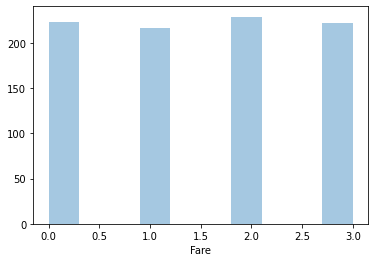

In [260]:
train_df.drop(['FareBand'], axis=1)
for dataset in [train_df]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
sns.distplot(train_df['Fare'], kde=False)
plt.show()


## 5. Conclusion

In [261]:
import pandas as pd
train_df = pd.read_csv('/Users/student/Desktop/B반_인공지능_NLP_기반_데이터_분석/data/train.csv')
test_df = pd.read_csv('/Users/student/Desktop/B반_인공지능_NLP_기반_데이터_분석/data/test.csv')

In [262]:
def wrangle(data_frame):
    for dataset in [data_frame]:
        dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
        dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q':2}) 
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
        title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
        test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
        dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
        dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
        dataset['Fare'] = dataset['Fare'].astype(int)
    data_frame = data_frame.drop(['Cabin', 'Ticket', 'Name', 'PassengerId', 'SibSp', 'Parch'], axis=1)
    return data_frame

#### Before Wrangling

In [263]:
print(train_df.columns.values)
print(train_df.head())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3

#### After Wranglling

In [264]:
train_df = wrangle(train_df)
test_df = wrangle(test_df)
print(train_df.columns.values)
print(train_df.head())

['Survived' 'Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'Title' 'FamilySize']
   Survived  Pclass  Sex   Age  Fare  Embarked  Title  FamilySize
0         0       3    1  22.0     0       0.0      1           2
1         1       1    0  38.0     3       1.0      3           2
2         1       3    0  26.0     1       0.0      2           1
3         1       1    0  35.0     3       0.0      3           2
4         0       3    1  35.0     1       0.0      1           1
